**IEEE Fraud detection**

**Load all the important libraries needed for data processing, data cleaning and modelling.**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read the two different file sources and join them to crete the dataset.**

In [0]:
id_raw_df   =pd.read_csv("train_identity.csv")
id_trans_df =pd.read_csv("train_transaction.csv")

from sklearn.model_selection import train_test_split

In [67]:
id_raw_df.shape


(144233, 41)

In [68]:
id_trans_df.shape

(348755, 394)

In [0]:
train_full_df = pd.merge(id_trans_df, id_raw_df, on='TransactionID', how='left')

**Looks like there is only a very small fraction of data that is a fradulent transaction.**

In [70]:
len(train_full_df[train_full_df["isFraud"]==1])/len(train_full_df)*100

3.3851844418001176

**Missing Values: Plotting the % missing of each column using the seaborn library.**

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

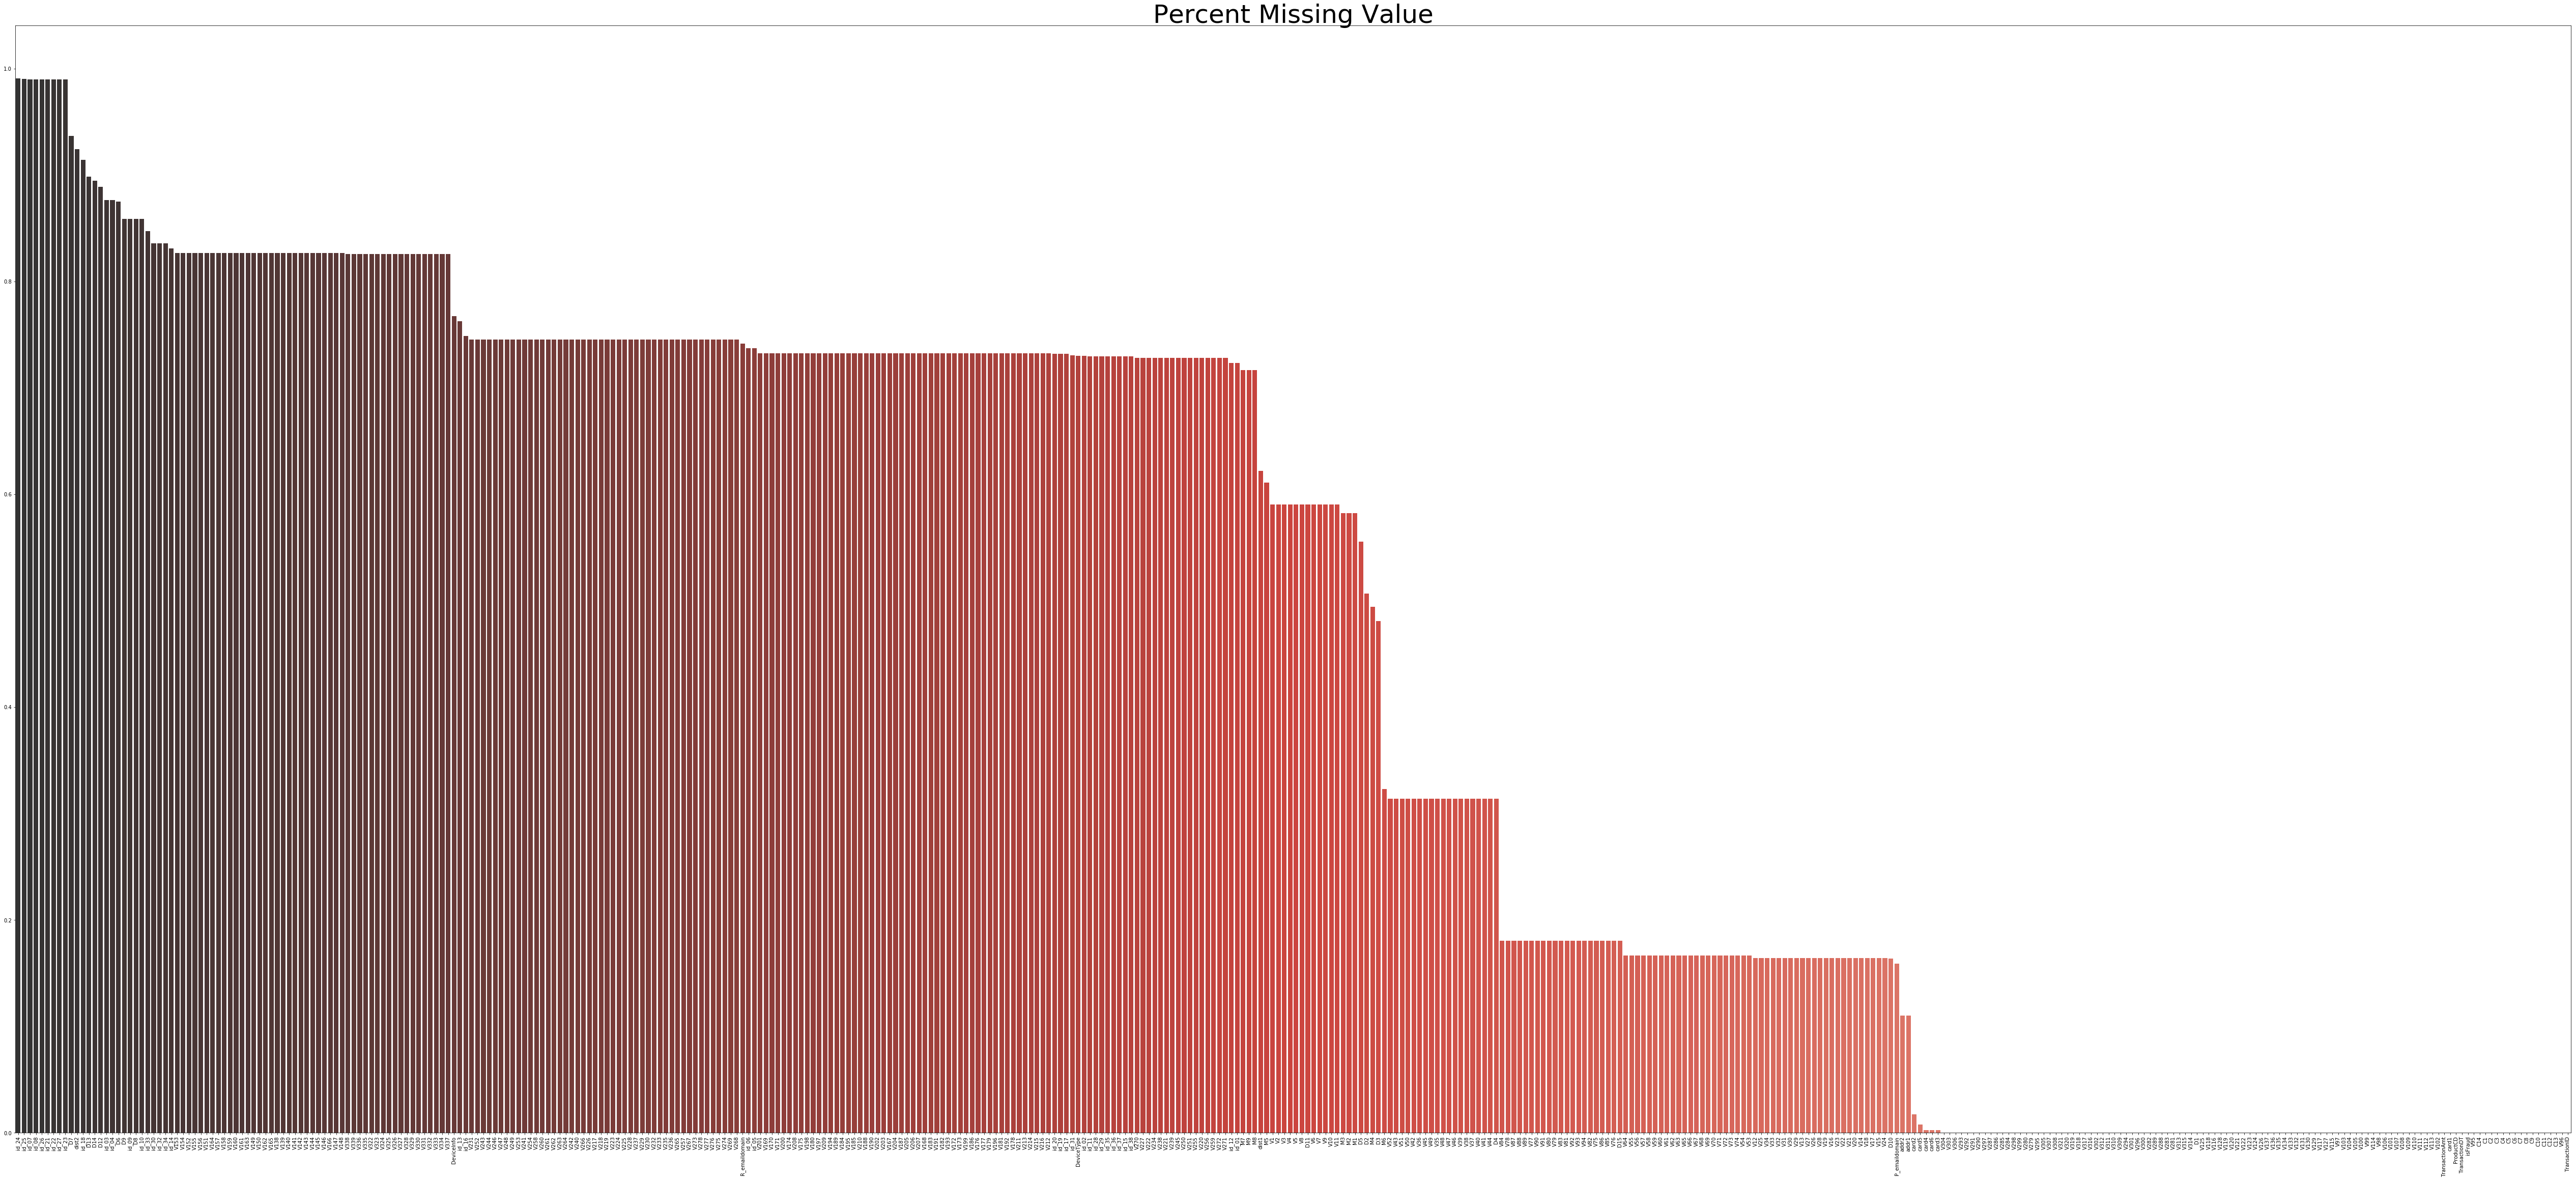

In [71]:
plt.figure(figsize=(90,40))
sns.barplot(y=train_full_df.isnull().sum().sort_values(ascending=False)/len(train_full_df),
            x=train_full_df.isnull().sum().sort_values(ascending=False).index,
            palette="Reds_d")
plt.title("Percent Missing Value",size=50)
plt.xticks(rotation=90)

In [0]:
columns_def=pd.DataFrame({"na_count":train_full_df.isnull().sum().sort_values(ascending=False)})

In [0]:
#Create column of percent columns, #higher is worst
columns_def["per"]=columns_def["na_count"]/len(train_full_df)

In [0]:
#cycle throungh various limit for percent Na per column
range=[0.05, 0.10 ,0.15, 0.25, 0.40, 0.60, 0.75]

In [75]:
for i in range: 
    print (columns_def[columns_def["per"]<i].shape[0]/train_full_df.shape[1])

0.25806451612903225
0.25806451612903225
0.2626728110599078
0.41935483870967744
0.46543778801843316
0.5092165898617511
0.8248847926267281


In [0]:
limit=0.10 #only columns w/ less 10% will remain

**Using the above threshold of limiting to 10% NA or below, the dataset is filtered. The new dimensions of the dataset are much lower compared to the original.**

In [77]:
#Select final columns
columns_final=columns_def[columns_def["per"]<limit].index 

train_full_df=train_full_df[train_full_df.columns.intersection(columns_final)]
train_full_df.shape

(348755, 112)

**As the column clean up has been done, it is time to convert the categorical variables to dummy varibles by one hot encoding them.**

In [78]:
#Show categorical variables
train_full_df[train_full_df.select_dtypes(include=['object']).columns]

,ProductCD,card4,card6
0,W,discover,credit
1,W,mastercard,credit
2,W,visa,debit
3,W,mastercard,debit
4,H,mastercard,credit
5,W,visa,debit
6,W,visa,debit
7,W,visa,debit
8,H,visa,debit
9,W,mastercard,debit


In [0]:
card6_dummy_df=pd.get_dummies(train_full_df["card6"])

In [0]:
train_full_df=pd.concat([train_full_df,card6_dummy_df],axis=1)

In [81]:

train_full_df=train_full_df._get_numeric_data()
train_full_df=train_full_df.dropna()

len(train_full_df[train_full_df["isFraud"]==1])/len(train_full_df)*100

3.319728210071698

In [0]:
x_full_df=train_full_df.drop(["isFraud","TransactionID"],axis=1)
y_full_df=train_full_df["isFraud"]

**Next step is to split the data into testing and training and run the modelling using logistic regression**

In [0]:
X_train,X_test,y_train,y_test=train_test_split(x_full_df,y_full_df,test_size=0.25)

In [0]:
from sklearn.linear_model import LogisticRegression  
from sklearn.preprocessing import StandardScaler  

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

**Modelling the binary classification dataset using logistic regression**

In [117]:

lr = LogisticRegression(solver='lbfgs',max_iter=1000000,random_state=123)  
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [118]:
lr.score(X_test, y_test)

0.9653790258309503

**As we can see the accuracy is pretty good but thats because of the large proportion of the majority class. The precision and recall scores are pretty low.**

In [0]:
y_pred=lr.predict(X_test)

In [120]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,82367,50,82417
1,2904,3,2907
All,85271,53,85324


In [121]:
recall_score(y_test, y_pred)


0.0010319917440660474

In [122]:
accuracy_score(y_test, y_pred)

0.9653790258309503

**In order to try and improve the recall scores, I am training the model using xgbost algorithm with cross validation below.**

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import xgboost as xgb

In [124]:
xgtrain = xgb.DMatrix(X_train, label=y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [0]:
clf = xgb.XGBClassifier(missing=9999999999,
                max_depth = 5,
                n_estimators=100,
                learning_rate=0.1, 
                nthread=4,
                subsample=0.8,
                colsample_bytree=0.5,
                min_child_weight = 3,
                seed=1301)
xgb_param = clf.get_xgb_params()

In [126]:
from sklearn.metrics import roc_auc_score
print ('Start cross validation')
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=500, nfold=2, metrics=['auc'],
     early_stopping_rounds=20, stratified=True, seed=1301)
print('Best number of trees = {}'.format(cvresult.shape[0]))
clf.set_params(n_estimators=cvresult.shape[0])
print('Fit on the training data')
clf.fit(X_train, y_train, eval_metric='auc')
print('Overall AUC:', roc_auc_score(y_train, clf.predict_proba(X_train)[:,1]))
print('Predict the probabilities based on features in the test set')
pred = clf.predict_proba(X_test, ntree_limit=cvresult.shape[0])


Start cross validation
Best number of trees = 500
Fit on the training data
Overall AUC: 0.9537210867478876
Predict the probabilities based on features in the test set


In [127]:
from sklearn import metrics
print("cross validated model training accuracy: %.2f%%" % (metrics.accuracy_score(y_train, clf.predict(X_train)) * 100.0))
print("cross validated model testing accuracy: %.2f%%" % (metrics.accuracy_score(y_test, clf.predict(X_test)) * 100.0))

print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
y_test.value_counts()

cross validated model training accuracy: 98.28%
cross validated model testing accuracy: 98.01%
[[82305   112]
 [ 1583  1324]]


0    82417
1     2907
Name: isFraud, dtype: int64

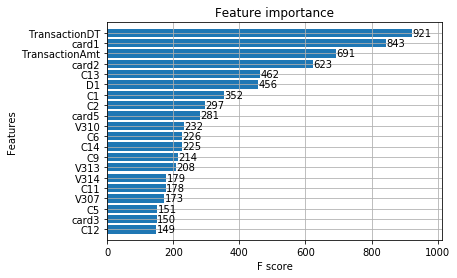

In [128]:
xgb.plot_importance(clf, max_num_features=20, height=0.8)
plt.show()

AUC: 0.932


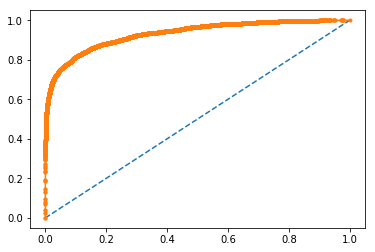

In [129]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

**As shown by the AUC curve and the recall score from the confusion matrix, the xgboost far outperforms logistic reression for this dataset.**